<a href="https://colab.research.google.com/github/EduardoZiul/T-picos-especiais-em-projeto-4/blob/main/Atividade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Resumo Técnico sobre Redes Neurais em Python (Com Explicações e Exemplos)

# Importações
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Gerando dados simulados simples para regressão
np.random.seed(0)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.sin(2 * np.pi * X) + np.random.randn(1000, 1) * 0.2

# Pré-processamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [2]:
# ---------------------- Exemplo de Perceptron Simples ----------------------
print("\nExemplo de Perceptron:")
def perceptron(x, w, b):
    z = np.dot(x, w) + b
    return z

w = np.array([2.0])
b = 1.0
print("Saída do perceptron para entrada X[0]:", perceptron(X_scaled[0], w, b))


Exemplo de Perceptron:
Saída do perceptron para entrada X[0]: 1.3640205120673912


In [3]:
# ---------------------- Rede Neural (Forward + Backpropagation) ----------------------
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=SGD(learning_rate=0.01), loss=MeanSquaredError())
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Predição e Avaliação
y_pred = model.predict(X_test)
print("\nMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

MSE: 0.12502201741105565
R²: 0.9546844898644478


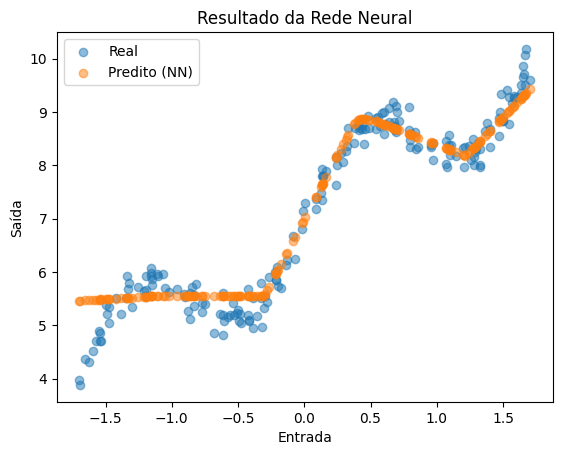

In [4]:
# ---------------------- Visualização ----------------------
plt.scatter(X_test, y_test, label='Real', alpha=0.5)
plt.scatter(X_test, y_pred, label='Predito (NN)', alpha=0.5)
plt.legend()
plt.title("Resultado da Rede Neural")
plt.xlabel("Entrada")
plt.ylabel("Saída")
plt.show()

In [5]:
# ---------------------- Explicações Conceituais ----------------------
print("""
CONCEITOS EXPLICADOS:

- Perceptron: unidade básica com entradas, pesos, bias e função de ativação.
- Forward Pass: dados fluem da entrada até a saída.
- Backpropagation: erro é propagado para ajustar pesos via derivadas.
- Funções de Ativação: introduzem não-linearidades (ex: ReLU, sigmoide).
- Camadas Ocultas: permitem aprender padrões complexos.
- Hiperparâmetros: epochs, batch_size, taxa de aprendizado, arquitetura.
- Divisão de dados: treino, validação, teste.
- Underfitting: modelo fraco. Overfitting: modelo aprende ruído. Regularização previne isso.
""")



CONCEITOS EXPLICADOS:

- Perceptron: unidade básica com entradas, pesos, bias e função de ativação.
- Forward Pass: dados fluem da entrada até a saída.
- Backpropagation: erro é propagado para ajustar pesos via derivadas.
- Funções de Ativação: introduzem não-linearidades (ex: ReLU, sigmoide).
- Camadas Ocultas: permitem aprender padrões complexos.
- Hiperparâmetros: epochs, batch_size, taxa de aprendizado, arquitetura.
- Divisão de dados: treino, validação, teste.
- Underfitting: modelo fraco. Overfitting: modelo aprende ruído. Regularização previne isso.

